## <span style="color:black"> PHASE 3 PROJECT SUBMISSION </span>
| Student Pace             | Project Review Date  | Instructor Name     | Blog Post URL  |
|--------------------------|--------------------------|---------------------|----------------|
| `Part Time`                | `September 01st, 2024`      | `Josphat Njuguna Wanjiru`      | _/_               |

**STUDENT NAME: JOSPHAT NJUGUNA WANJIRU**

# <span style="color:black"> SyriaTel CUSTOMER CHURN PREDICTION MODEL </span>

## <span style="color:black"> PROJECT OVERVIEW </span> <a class="anchor" id="first-bullet"></a>

This project seeks to build a Machine Learning classifier algorithm that can predict the probability of customers churning SyriaTel company using data such as

## <span style="color:black"> BUISNESS UNDERSTANDING </span> <a class="anchor" id="first-bullet"></a>

Syriatel is a mobile network provider in Syria.[1] It is one of the only two providers in Syria, the other being MTN Syria. In 2022 the Syrian telecommunications authority awarded the third telecom license to Wafa Telecom.[3] It offers LTE with 150 Mb/s speeds, under the brand name Super Sur

## <span style="color:black"> BUSINESS PROBLEM </span> <a class="anchor" id="fourth-bullet"></a>

The ability to predict that a particular customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for every online business. Besides the direct loss of revenue that results from a customer abandoning the business, the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. (In other words, acquiring that customer may have actually been a losing investment.) Furthermore, it is always more difficult and expensive to acquire a new customer than it is to retain a current paying customer

Customer churn is the loss of clients or customers. Predicting churn can help the Telecom company, so it can effectively focus a customer retention marketing program (e.g. a special offer) to the subset of clients which are most likely to change their carrier. Therefore, the “churn” column is chosen as target and the following predictive analysis is a supervised classification problem.

## <span style="color:black"> BUSINESS AIM AND OBJECTIVES </span> <a class="anchor" id="fifth-bullet"></a>

The aim of this project is to predict customer churn and retention in SyriaTel company

The objectives of the are:

1. 

#### **`STUDY QUESTIONS:`**<br> <a class="anchor" id="sixth-bullet"></a>


## <span style="color:black"> DATA UNDERSTANDING </span>

### <span style="color:black"> 

In [481]:
# scientific computing libaries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data mining libaries
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


## <span style="color:black"> DATA UNDERSTANDING </span>

### <span style="color:red">

The dataset contains data on the customers of a SyriaTel Telecom company. Each row represents a customer and the columns contain customer’s attributes which are described in the following:

In [482]:
# Import the SyriaTel customer data
df = pd.read_csv('./bigml_59c28831336c6604c800002a.csv')

In [483]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



Rows 3333
Columns 21
Each row is a customer



| Field Name                 | Description                                                                                   |
|----------------------------|-----------------------------------------------------------------------------------------------|
| **state**                  | The state the user lives in                                                                   |
| **account length**         | The number of days the user has had this account                                              |
| **area code**              | The code of the area the user lives in                                                        |
| **phone number**           | The phone number of the user                                                                  |
| **international plan**     | `true` if the user has the international plan, otherwise `false`                              |
| **voice mail plan**        | `true` if the user has the voice mail plan, otherwise `false`                                 |
| **number vmail messages**  | The number of voice mail messages the user has sent                                           |
| **total day minutes**      | Total number of minutes the user has been in calls during the day                             |
| **total day calls**        | Total number of calls the user has made during the day                                        |
| **total day charge**       | Total amount of money the user was charged by the Telecom company for calls during the day    |
| **total eve minutes**      | Total number of minutes the user has been in calls during the evening                         |
| **total eve calls**        | Total number of calls the user has made during the evening                                    |
| **total eve charge**       | Total amount of money the user was charged by the Telecom company for calls during the evening|
| **total night minutes**    | Total number of minutes the user has been in calls during the night                           |
| **total night calls**      | Total number of calls the user has made during the night                                      |
| **total night charge**     | Total amount of money the user was charged by the Telecom company for calls during the night  |
| **total intl minutes**     | Total number of minutes the user has been in international calls                              |
| **total intl calls**       | Total number of international calls the user has made                                         |
| **total intl charge**      | Total amount of money the user was charged by the Telecom company for international calls     |
| **customer service calls** | Number of customer service calls the user has made                                            |
| **churn**                  | `true` if the user terminated the contract, otherwise `false`                                 |





## <span style="color:black">EXPLORATORY DATA ANALYSIS (EDA)</span> <a class="anchor" id="eighth-bullet"></a>
In the EDA section, we explored the various features in the data, clean and tranform some of the features.

In [484]:
#checking data  shape
df.shape
print('Number of rows =', df.shape[0])
print('Number of columns =', df.shape[1])

Number of rows = 3333
Number of columns = 21


In [485]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Splitting Categorical from Numerical

In [486]:
# Selecting categorical variables
categorical = df.select_dtypes(include=['object'])
#Selecting numerical variables
numerical = df.select_dtypes(include=['number'])

### Number of labels: cardinality

In [487]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels


The phone number has a  high cadinality and may pose problems in the classification model. Therefore it was dropped.

In [488]:
# Dropping phone number
df.drop(['phone number'], axis=1, inplace=True)

### Feature Engineering of Area Code and Churn Variable

The target variable 'churn' was converted from boolean to object and area code was converted from numeric to categorical 

In [489]:
# Feature Enginnering of Area code from mumerical to categorical
df['area code'] = df['area code'].astype(str)
# Feature Engineering of churn Variable from boolean datatype to object
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int')
df['churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [490]:
# checking for duplicates
df.duplicated().sum()

0

There are no duplicate values

In [491]:
# Checking for missing values 
df.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset does not contain any significant number of NaN values

### Descriptive Statistics

In [492]:
# Computing the descriptive statistics
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


To aid in the interpretation of the above statistics we created graphs which visualize them in a better way. Firstly, we look at the distribution of the our target variable

### Churn Distribution

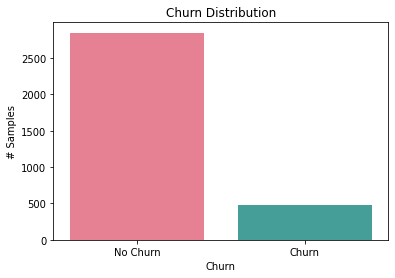

In [493]:
# Churn dictionary for labeling
churn_dict = {0: "No Churn", 1: "Churn"}
df['churn_label'] = df['churn'].map(churn_dict)

# Setting color palette
colors = sns.color_palette("husl", len(df['churn_label'].unique()))

# Creating the bar plot
sns.countplot(x='churn_label', data=df, palette=colors)

# Set plot title and labels
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('# Samples')

# Display the plot
plt.show()

In [494]:
churn_perc = df["churn"].sum() * 100 / df["churn"].shape[0]
print("Churn percentage is %.3f%%." % churn_perc)

Churn percentage is 14.491%.


We observe a noticeable imbalance in our data, with a higher number of samples for customers who did not churn compared to those who did. This class imbalance in the target variable might cause our predictive models to be skewed towards the majority class, which in this case is customers who did not churn. To mitigate this potential bias, we will consider implementing oversampling techniques when developing our models.

Following this, we will analyze how churn rates vary by state to assess the impact of geographic location on our target variable.

### Churn by State

<Axes: xlabel='state'>

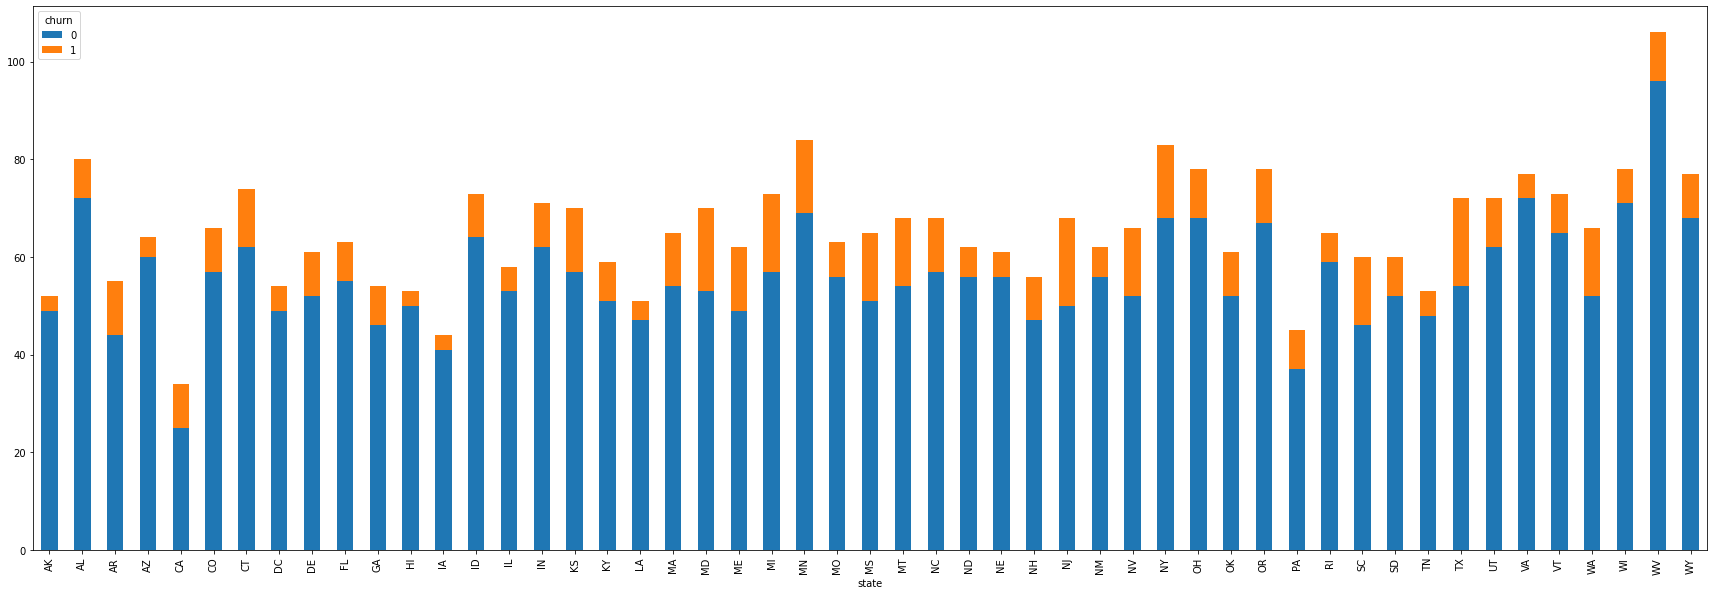

In [495]:

df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 


We notice that certain states, such as AK, HI, and IA, have a lower proportion of customers who churn, while others, like WA, MD, and TX, have a higher proportion. This indicates that the state a customer is in could be an important factor in predicting churn. Therefore, it’s essential to include the state variable in our further analysis.

The interactive graph below illustrates the distribution of each feature for customers who churned and those who didn’t. You can use the slider to switch between the various features and observe their distributions.

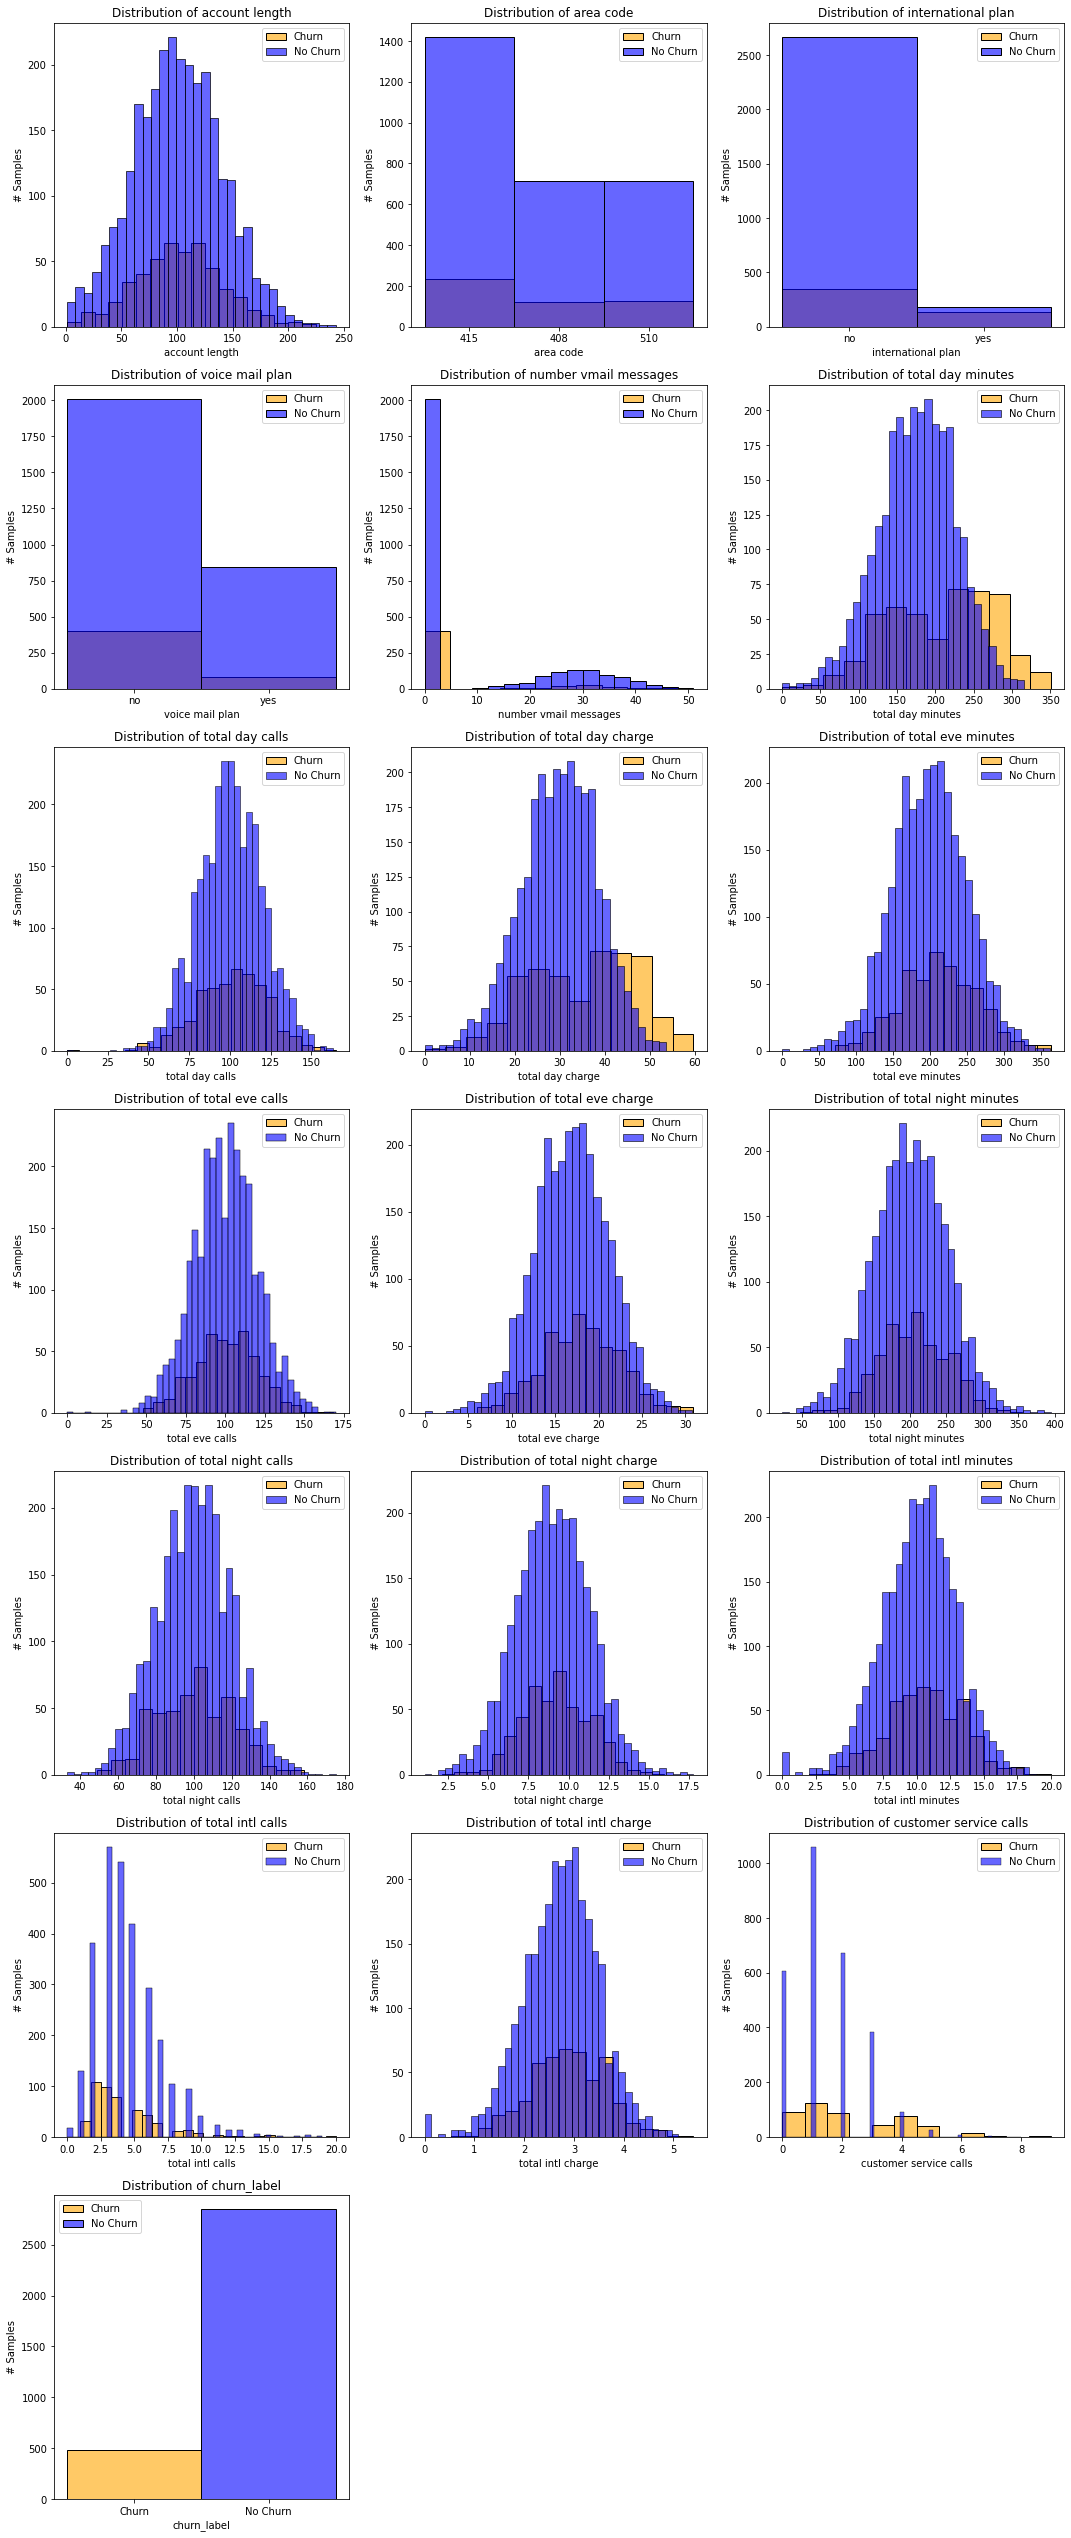

In [496]:
# Exclude non-numerical features and target variable
features_not_for_hist = ["state", "phone_number", "churn"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]

# Separate churned and non-churned customers
churn = df[df['churn'] == 1]
no_churn = df[df['churn'] == 0]

# Number of rows and columns for the grid
n_rows = len(features_for_hist) // 2 + len(features_for_hist) % 2
n_cols = 3

plt.figure(figsize=(15, n_rows * 5))

for i, feature in enumerate(features_for_hist):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(churn[feature], kde=False, color='orange', label='Churn', alpha=0.6)
    sns.histplot(no_churn[feature], kde=False, color='blue', label='No Churn', alpha=0.6)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('# Samples')
    plt.legend()

plt.tight_layout()
plt.show()


One notable observation comes from the histogram of the "international_plan" feature. Customers who have an international plan exhibit a much higher proportion of churn compared to those without it.

The histograms for "total_day_minutes" and "total_day_charge" reveal a similar trend, where customers with higher values for these features are more likely to churn. Interestingly, this pattern does not hold for the number of day calls, suggesting that customers who churn tend to make longer calls rather than more frequent ones. In contrast, the distributions for minutes, charges, and the number of calls during other times of the day (i.e., evening, night) do not differ significantly between customers who churn and those who do not.

Another intriguing pattern emerges in the "total_intl_calls" feature. The data for customers who churn is more left-skewed compared to those who do not churn, indicating a distinct difference in their international calling behavior.

### Outlier Analysis using Boxplot

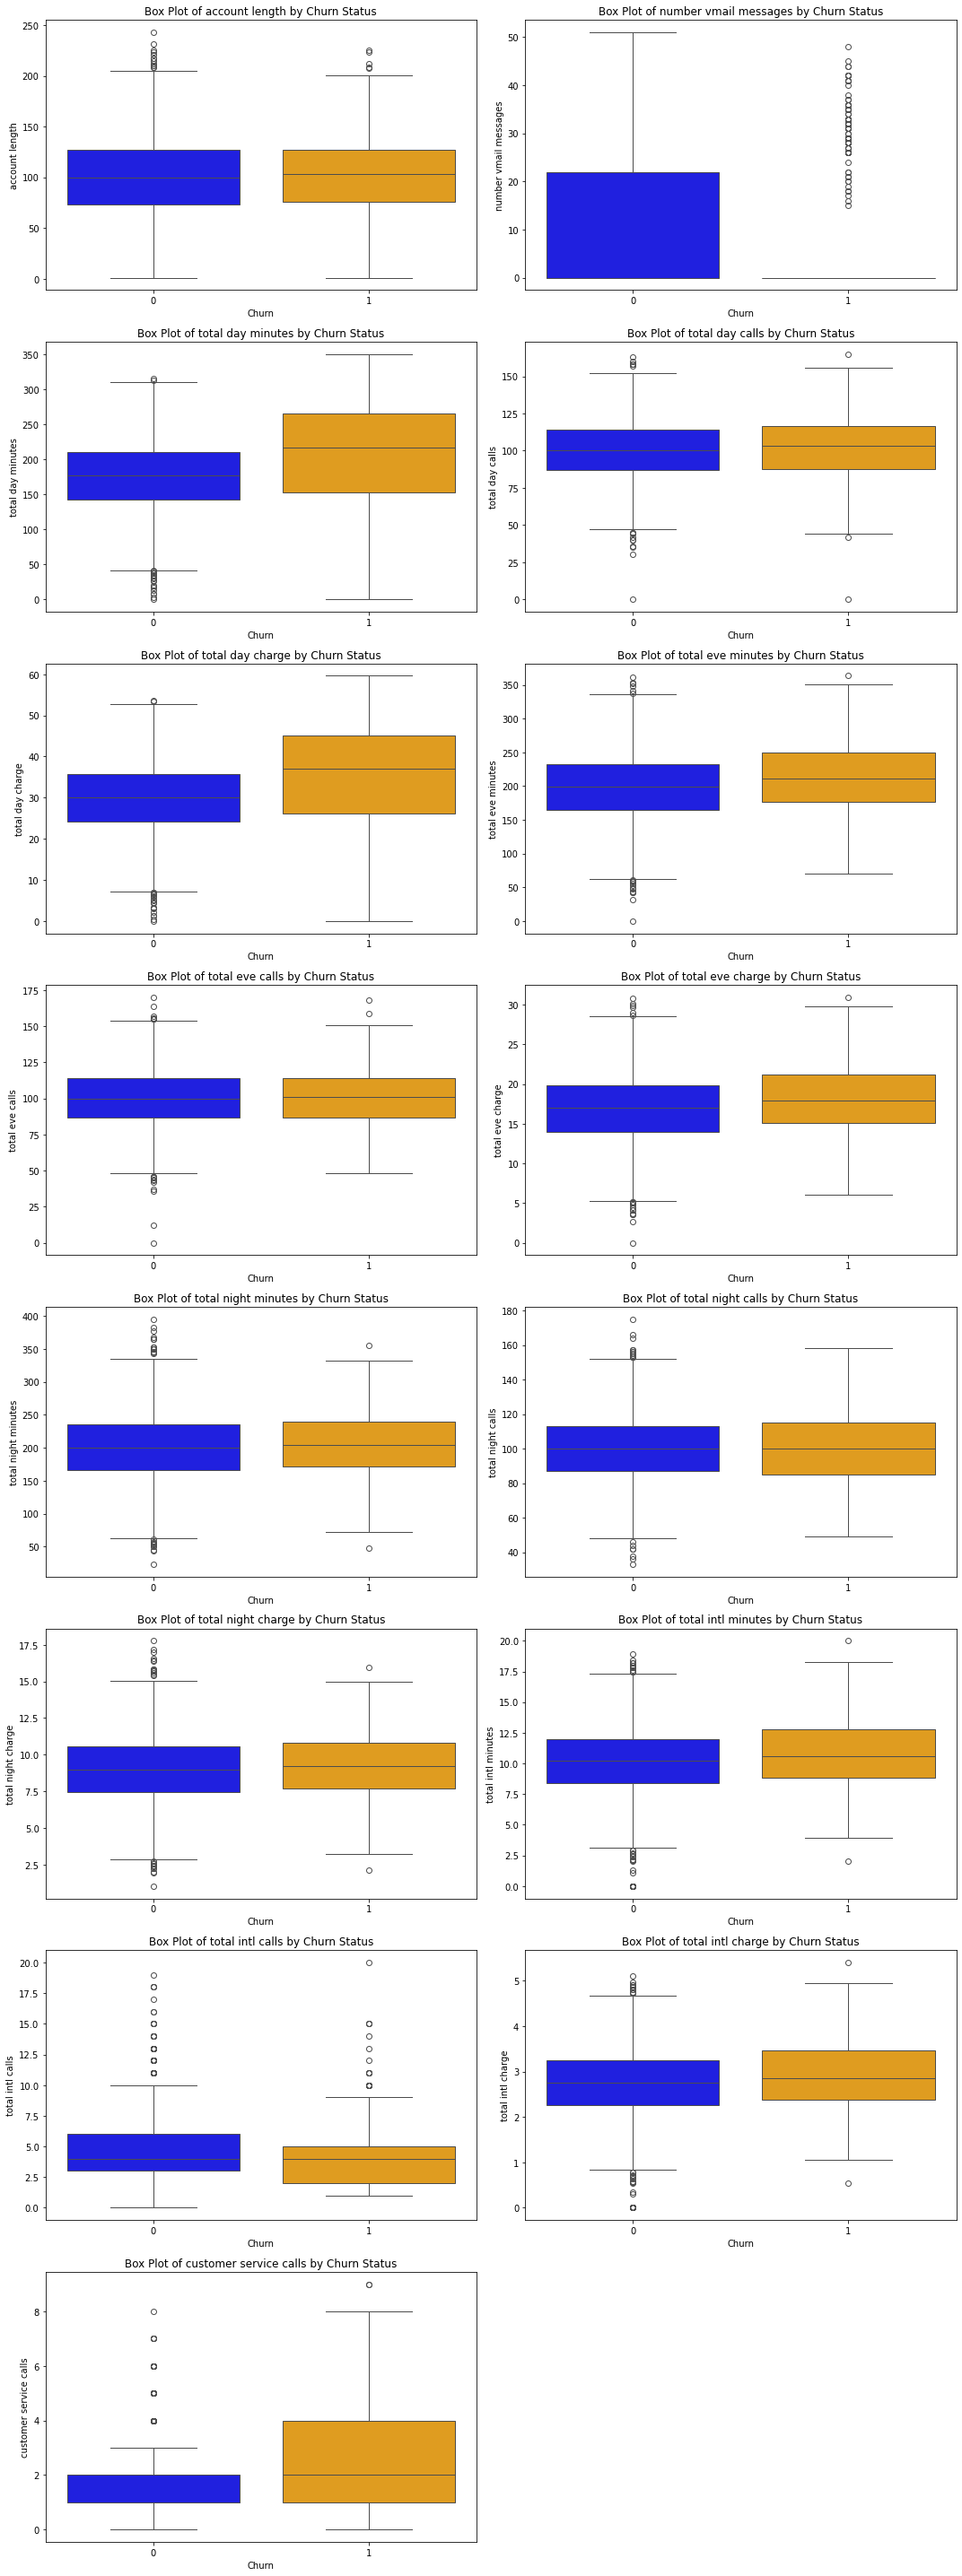

In [497]:
# Separate churned and non-churned customers
churn = df[df['churn'] == 1]
no_churn = df[df['churn'] == 0]

# Exclude non-numerical features and target variable
features_not_for_hist = ["state", "phone number", "churn"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]

# Remove features with too few distinct values (e.g., binary features)
features_for_box = [col for col in features_for_hist if len(df[col].unique()) > 5]

# Number of rows and columns for the grid
n_rows = len(features_for_box) // 2 + len(features_for_box) % 2
n_cols = 2

# Set up the figure for multiple subplots
plt.figure(figsize=(15, n_rows * 5))

for i, feature in enumerate(features_for_box):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='churn', y=feature, data=df, palette=["blue", "orange"])
    plt.title(f'Box Plot of {feature} by Churn Status')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

When examining the box plot for the number of voice mail messages ("number_vmail_messages"), it becomes apparent that there are some outliers among customers who churned, though the majority of them sent zero voice mail messages. In contrast, customers who did not churn tend to send more voice mail messages.

Consistent with our observations from the histograms, the box plot also reveals that the median values for total day minutes and total day charge are higher for customers who churned compared to those who didn’t.

For the total international calls ("total_intl_calls"), the box plot indicates that both churned and non-churned customers make a similar number of international calls. However, churned customers tend to make longer calls, as their median total international minutes is higher than that of non-churned customers.

Lastly, the box plot for the number of customer service calls shows that customers who churned have a higher median and greater variance in the number of customer service calls compared to those who did not churn.

### Investigate Pairwise Correlation

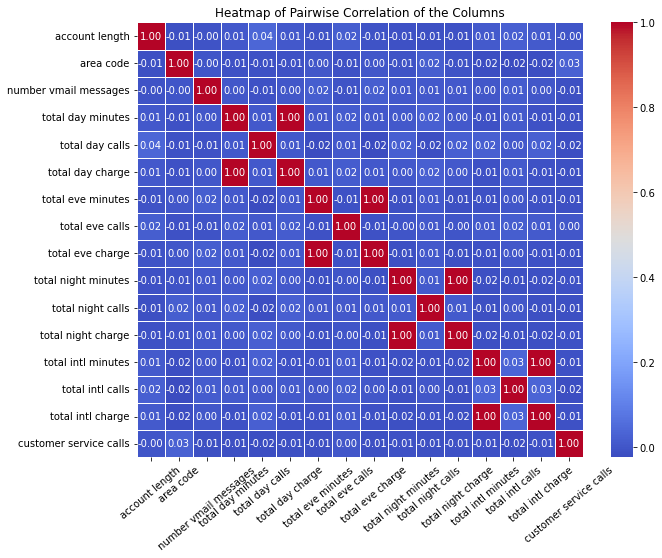

In [498]:
# Calculate the correlation matrix
corr = numerical.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title and show the plot
plt.title('Heatmap of Pairwise Correlation of the Columns')
plt.xticks(rotation=40)
plt.yticks(rotation=0)
plt.show()

The heatmap reveals several key insights regarding the correlations among the features in the dataset. Notably, there is a perfect correlation between several pairs of features, particularly those related to call minutes and charges. For example, total day minutes and total day charge, as well as total evening minutes and total evening charge, total night minutes and total night charge, and total international minutes and total international charge, all show a correlation of 1.00. This strong relationship suggests that the charges are directly proportional to the number of minutes used, indicating that the Telecom company likely charges customers based on the duration of their calls.

In contrast, the correlation between the churn variable and other features is relatively weak, with the highest observed correlation being around 0.21. This weak association implies that while certain factors, such as having an international plan or the number of customer service calls, may have some influence on customer churn, these factors alone do not strongly predict churn.

Additionally, most other features exhibit weak correlations with each other, generally below 0.05, indicating that they are largely independent of one another. Given these observations, there is an opportunity to reduce the dimensionality of the dataset by removing redundant features. Specifically, since features like total day minutes and total day charge are perfectly correlated, one of these can be removed without losing significant information. Overall, while the weak correlations with churn suggest a need for further investigation, particularly in exploring more complex interactions or additional variables that might better explain customer behavior, the analysis provides a clear direction for simplifying the dataset by eliminating redundant features.

### Reducing Dimensionality of the Dataset

In [499]:
# Calculate the correlation matrix
corr_matrix = numerical.corr().abs()

# Create a mask to identify the upper triangle of the correlation matrix
upper_tri = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Filter the correlation matrix to only keep the upper triangle
upper_corr_matrix = corr_matrix.where(upper_tri)

# Define a threshold for high correlation
threshold = 0.95

# Find index of features with correlation greater than the threshold
to_drop = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > threshold)]

# Drop the features that have high correlation
reduced_df = df.drop(columns=to_drop)

# Output the names of the dropped features
print(f"Dropped columns due to high correlation: {to_drop}")

# Show the reduced DataFrame
print("Shape of reduced_df ",reduced_df.shape,"shape of original_df", df.shape)
reduced_df.head()


Dropped columns due to high correlation: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
Shape of reduced_df  (3333, 17) shape of original_df (3333, 21)


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,churn_label
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,No Churn
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,No Churn
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,No Churn
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,No Churn
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,No Churn


## Preprocessing

To prepare the dataset for further analysis, we first split it into the target column and the other predictor variables. Additionally, we standardize all features to ensure that features with higher absolute values do not disproportionately influence classifiers that rely on distance metrics.

In [500]:
# splitting the dataset into feature vectors and the target variable
y = reduced_df["churn"]
X = reduced_df.drop(["churn","churn_label"], axis=1)

In [501]:
# Split Train and Validation Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [502]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 15) (667, 15) (2666,) (667,)


### Encode Categorical Data

In [503]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of Categorical Columns
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# One hot encode categorical features using category_encoders library
ohe = ce.OneHotEncoder(cols=categorical_columns, handle_missing="value", handle_unknown="ignore")

# Fit and transform the data
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

X_train.head()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
817,1,0,0,0,0,0,0,0,0,0,...,0,95.5,92,163.7,63,264.2,118,6.6,6,2
1373,0,1,0,0,0,0,0,0,0,0,...,0,112.0,105,193.7,110,208.9,93,4.1,4,4
679,0,0,1,0,0,0,0,0,0,0,...,0,222.4,78,327.0,111,208.0,104,8.7,9,1
56,0,0,0,1,0,0,0,0,0,0,...,0,126.9,98,180.0,62,140.8,128,8.0,2,1
1993,0,0,0,0,1,0,0,0,0,0,...,0,216.3,96,266.3,77,214.0,110,4.5,3,0


We now have the training and testing sets prepared for model building. Before proceeding, it's essential to map all the feature variables onto the same scale, a process known as `feature scaling`. Here's how I performed it:

In [504]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training data
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns) 

# Scale the test data
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns 
)

# Display the first few rows of the scaled training data
X_train.head()


,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,6.705633,-0.133962,-0.150437,-0.147809,-0.141042,-0.139653,-0.151736,-0.143784,-0.142419,-0.121843,...,-0.584936,-1.547653,-0.429657,-0.729987,-1.840891,1.255804,0.925634,-1.300791,0.634849,0.318978
1,-0.149128,7.464811,-0.150437,-0.147809,-0.141042,-0.139653,-0.151736,-0.143784,-0.142419,-0.121843,...,-0.584936,-1.244014,0.224176,-0.138082,0.499864,0.165090,-0.353704,-2.194793,-0.184370,1.813519
2,-0.149128,-0.133962,6.647288,-0.147809,-0.141042,-0.139653,-0.151736,-0.143784,-0.142419,-0.121843,...,-0.584936,0.787609,-1.133785,2.491952,0.549667,0.147339,0.209205,-0.549828,1.863677,-0.428293
3,-0.149128,-0.133962,-0.150437,6.765496,-0.141042,-0.139653,-0.151736,-0.143784,-0.142419,-0.121843,...,-0.584936,-0.969818,-0.127888,-0.408385,-1.890695,-1.178086,1.437368,-0.800149,-1.003589,-0.428293
4,-0.149128,-0.133962,-0.150437,-0.147809,7.090080,-0.139653,-0.151736,-0.143784,-0.142419,-0.121843,...,-0.584936,0.675354,-0.228477,1.294330,-1.143645,0.265680,0.516246,-2.051753,-0.593980,-1.175564


In [505]:
X_train.describe()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
count,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,...,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03,2.666000e+03
mean,-5.730183e-17,7.995605e-18,-5.730183e-17,-2.665202e-18,-1.732381e-17,5.330403e-18,-3.864542e-17,3.164927e-17,-5.197143e-17,-2.265421e-17,...,1.066081e-17,-1.599121e-17,2.531941e-17,1.425883e-16,6.663004e-17,1.579132e-16,3.171590e-16,-2.105509e-16,-1.066081e-17,-2.998352e-18
std,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,...,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00,1.000188e+00
min,-1.491283e-01,-1.339619e-01,-1.504373e-01,-1.478088e-01,-1.410421e-01,-1.396527e-01,-1.517359e-01,-1.437839e-01,-1.424191e-01,-1.218435e-01,...,-5.849355e-01,-3.257234e+00,-3.547937e+00,-3.959818e+00,-4.978499e+00,-3.497578e+00,-3.424113e+00,-3.660958e+00,-1.822808e+00,-1.175564e+00
25%,-1.491283e-01,-1.339619e-01,-1.504373e-01,-1.478088e-01,-1.410421e-01,-1.396527e-01,-1.517359e-01,-1.437839e-01,-1.424191e-01,-1.218435e-01,...,-5.849355e-01,-6.698596e-01,-6.308362e-01,-6.880605e-01,-6.456121e-01,-6.652726e-01,-7.119181e-01,-6.213486e-01,-5.939798e-01,-4.282933e-01
50%,-1.491283e-01,-1.339619e-01,-1.504373e-01,-1.478088e-01,-1.410421e-01,-1.396527e-01,-1.517359e-01,-1.437839e-01,-1.424191e-01,-1.218435e-01,...,-5.849355e-01,-7.374065e-03,2.299678e-02,2.989130e-03,1.830729e-03,6.315095e-03,4.510791e-03,2.233330e-02,-1.843703e-01,-4.282933e-01
75%,-1.491283e-01,-1.339619e-01,-1.504373e-01,-1.478088e-01,-1.410421e-01,-1.396527e-01,-1.517359e-01,-1.437839e-01,-1.424191e-01,-1.218435e-01,...,8.075508e-01,6.748940e-01,6.768297e-01,6.698693e-01,6.492736e-01,6.877646e-01,6.697662e-01,6.302551e-01,6.348486e-01,3.189776e-01
max,6.705633e+00,7.464811e+00,6.647288e+00,6.765496e+00,7.090080e+00,7.160622e+00,6.590397e+00,6.954881e+00,7.021530e+00,8.207251e+00,...,3.152791e+00,3.150474e+00,3.241867e+00,3.216049e+00,3.488061e+00,3.835647e+00,3.842522e+00,3.491064e+00,5.959771e+00,5.549874e+00


### Baseline Model

The baseline model was chosen to be a logistic regression classifier

In [506]:
# training a logistic regression model on the training set

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Predict Results

In [508]:
# Predict training results using baseline model
y_pred_train = logreg.predict(X_train)

# Predict test results using baseline model
y_pred_test = logreg.predict(X_test)

### Checking for Accuracy

In [514]:
# Test set Accuracy Score of the baseline Model
# Training set Accuracy score
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Test set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Training-set accuracy score: 0.8706
Test set accuracy score: 0.8576


* A training accuracy of 0.87 means that the model correctly predicts the target variable for 87% of the instances in the training data where as a test accuracy of 0.85 mean that the model correctly predicts the target variable for 85% of the instances in the test data
* The training accuracy of 0.87 and a test accuracy of 0.85 mean that the model is performing consistently well on both the data it was trained on and new data it has nott seen before. 
* This indicates that the model is likely well-generalized, meaning it is not overfitting or underfitting. The small difference between the two accuracies is expected and indicates a good balance between bias and variance in the model.

In [515]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [516]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8710
Test set score: 0.8576


The  increase of C to 100 leads to better performance on the training set (higher training accuracy), but this improvement does not carry over to the test set. This suggests that the model might be overfitting, and the increase in model complexity does not help in making better predictions on unseen data. To improve test set performance, it may be necessary to either reduce C (strengthen regularization) or explore other strategies like cross-validation, feature selection, or data augmentation to enhance generalization.

In [517]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [519]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8680
Test set score: 0.8501


### Compare model accuracy with null accuracy

In [520]:
# check class distribution in test set

y_test.value_counts()

churn
0    566
1    101
Name: count, dtype: int64

We can see that the occurences of most frequent class is 566. So, we can calculate null accuracy by dividing 566 by total number of occurences.

In [522]:
 #check null accuracy score

null_accuracy = (566/(566+101))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8486


We can see that our model accuracy score is 0.8501 but null accuracy score is 0.8486. So, we can conclude that our Logistic Regression model is in predicting the class labels.

There was consideration of other evaluation metrics, such as precision, recall, F1-score, or ROC-AUC, given that the dataset is imbalanced and that accuracy alone is not sufficient to fully evaluate the model's performance. Additionally, cross-validation could be used to further assess the model's stability and generalization across different subsets of the data.